In [523]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.signal import butter, lfilter

In [524]:
#Read data from CSV datafile
#usecols: 0,1 for Sitting; 5,6: for Sleeping; 10,11 for Standing; 15,16 for Walking;
dataset = pd.read_excel("data.xlsx", usecols=[0,1]) 
array_data = np.array(dataset);
array_data = array_data[:30000]

In [525]:
#x is time, y is RED
x = np.array([i*0.02 for i in range(0,30000)]);
y = array_data[:,1];

In [526]:
#Functions for Butterworth filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [527]:
#Filter RED data for Heart Rate (0.5-1.5 Hz)
y_HR = butter_bandpass_filter(y[:], 0.5, 1.5, 50, order=5)

In [528]:
from scipy.signal import argrelmax, argrelextrema

#Finding the index of peaks for heart rate
peakindex_HR = argrelextrema(y_HR, np.greater)

#Storing the peaks and corresponding times for Heart rate
peaks_HR = [y_HR[i] for i in peakindex_HR]
time_HR = [x[i] for i in peakindex_HR]

In [529]:
#Calculating denominators for Heart Rate formula - distance between two peaks
HR_diff = [peakindex_HR[0][i+1] - peakindex_HR[0][i] for i in range(len(peakindex_HR[0])-1)]
#print HR_diff

#Calculating heart rate
HR_array = []
for i in HR_diff:
    HR_array.append(3000.0/i);    #Instantaneous Heart rate
print "Instantaneous Heart Rate"

HR_array = np.array(HR_array)
HR_array_range = [HR_array[i] for i in range(len(HR_array)) if 70 < HR_array[i] and HR_array[i] < 100]
print np.around(HR_array_range[:],4)
print "Average Heart Rate: "
print np.mean(HR_array_range)

Instantaneous Heart Rate
[ 88.2353  71.4286  71.4286  85.7143  88.2353  83.3333  88.2353  90.9091
  73.1707  76.9231  81.0811  90.9091  88.2353  90.9091  88.2353  73.1707
  76.9231  75.      71.4286  96.7742  93.75    73.1707  75.      88.2353
  85.7143  73.1707  71.4286  75.      90.9091  85.7143  75.      71.4286
  85.7143  85.7143  81.0811  83.3333  71.4286  76.9231  71.4286  88.2353
  73.1707  83.3333  71.4286  73.1707  96.7742  83.3333  73.1707  76.9231
  83.3333  93.75    73.1707  88.2353  73.1707  73.1707  93.75    73.1707
  78.9474  83.3333  81.0811  88.2353  76.9231  78.9474  71.4286  75.
  73.1707  71.4286  96.7742  88.2353  76.9231  76.9231  75.      93.75
  88.2353  76.9231  85.7143  71.4286  81.0811  83.3333  90.9091  83.3333
  90.9091  75.      75.      85.7143  93.75    75.      76.9231  88.2353
  78.9474  90.9091  73.1707  88.2353  93.75    76.9231  88.2353  96.7742
  90.9091  96.7742  88.2353  96.7742  78.9474  88.2353  83.3333  78.9474
  76.9231  76.9231  90.9091  85.

In [530]:
#Filtering for Respiration rate
y_R = butter_bandpass_filter(y[:], 0.2, 0.5, 50, order=5)

#Finding index of peaks for Respiration rate
peakindex_R = argrelextrema(y_R, np.greater)

#Finding peaks and corresponding times for Respiration rate
peaks_R = [y_R[i] for i in peakindex_R]
time_R = [x[i] for i in peakindex_R]

In [531]:
#print time_R

#Finding respiration rate
R_array = []
R_diff = [time_R[0][i+1] - time_R[0][i] for i in range(len(time_R[0])-1)]
for i in R_diff:
    R_array.append(60/i)    #Instantaneous

print "Instantaneous Respiration Rate: "
print np.around(R_array[1:],4)    
#Average
print "Average respiration rate: ", np.around(np.mean(R_array[1:]),4)

Instantaneous Respiration Rate: 
[ 17.0455  17.341   17.4419  17.2414  17.0455  16.9492  16.8539  17.1429
  17.4419  16.7598  16.7598  16.6667  17.341   17.4419  17.1429  17.1429
  17.0455  17.4419  17.1429  16.9492  17.1429  17.0455  17.341   16.9492
  17.0455  17.4419  17.341   17.2414  17.341   17.0455  17.2414  17.1429
  17.2414  16.9492  17.2414  17.341   17.341   16.9492  16.9492  17.341
  17.2414  17.2414  17.0455  17.1429  17.341   17.1429  17.341   17.5439
  17.2414  17.0455  17.2414  17.0455  16.8539  17.0455  17.341   17.2414
  17.0455  17.341   17.0455  17.1429  17.1429  17.0455  17.1429  16.9492
  17.1429  17.1429  17.341   17.341   17.4419  17.341   17.0455  17.1429
  17.0455  17.1429  17.1429  17.2414  16.7598  17.4419  17.2414  17.4419
  17.341   17.341   17.6471  17.341   17.1429  17.341   17.341   17.341
  17.1429  17.2414  17.1429  16.8539  17.1429  17.1429  17.8571  17.4419
  17.341   17.4419  17.0455  17.341   16.9492  17.6471  17.2414  17.341
  17.341   16.9492  1

In [532]:
#SPO2 calculation

#Already calculated max peaks for RED (peaks_HR, time_HR)
#Applying filter
y_RED = butter_bandpass_filter(y[:], 0.001, 1, 50, order=2)

#Finding index of peaks for RED
peakindex_RED = argrelextrema(y_RED, np.greater)

#Calculating peaks and corresponding times for RED
peaks_RED = [y_RED[i] for i in peakindex_RED]
time_RED = [x[i] for i in peakindex_RED]

#Finding min peaks index for RED
peakindex_RED_min = argrelextrema(y_RED, np.less)
peaks_RED_min = [y_RED[i] for i in peakindex_RED_min]
time_RED_min = [x[i] for i in peakindex_RED_min]

In [533]:
#Interpolating min peaks for RED to find DC at time_HR
DC_RED = np.interp(time_RED[0], time_RED_min[0], peaks_RED_min[0])

#Calculating AC for RED values
AC_RED = peaks_RED[0] - DC_RED

In [534]:
#z is IR values
z = array_data[:,0];

#Applying filter
z_IR = butter_bandpass_filter(z[:], 0.001, 1, 50, order=2)

#Finding index of peaks for IR
peakindex_IR = argrelextrema(z_IR, np.greater)

#Calculating peaks and corresponding times for IR
peaks_IR = [z_IR[i] for i in peakindex_IR]
time_IR = [x[i] for i in peakindex_IR]

#Finding index of min peaks for IR
peakindex_IR_min = argrelextrema(z_IR, np.less)

#Finding peaks and corresponding times for min IR peaks
peaks_IR_min = [z_IR[i] for i in peakindex_IR_min]
time_IR_min = [x[i] for i in peakindex_IR_min]

In [535]:
#Interpolating min peaks for RED to find DC at time_IR
DC_IR = np.interp(time_IR[0], time_IR_min[0], peaks_IR_min[0])

#Calculating AC for IR values
AC_IR = peaks_IR[0] - DC_IR

In [536]:
#Calculating ratio average
#Finding if RED/ IR has lesser number of peaks
length = 0
if len(AC_RED) < len(DC_IR):
    length = len(AC_RED)
else:
    length = len(DC_IR)
        
num = AC_RED[0:length]*DC_IR[0:length]
den = AC_IR[0:length]*DC_RED[0:length]

ratio_avg = num/den

In [537]:
#print ratio_avg

In [538]:
spo2 = -45.060*ratio_avg*ratio_avg+30.354*ratio_avg+94.
print "Instantanous SPO2: "
spo2_range = [spo2[i] for i in range(len(spo2)) if spo2[i]>90 and spo2[i]<100]
print np.around(spo2_range[:],4)
print "Average SPO2: ", np.around(np.mean(spo2_range),4)

Instantanous SPO2: 
[ 94.5519  99.0172  98.2377  96.405   97.321   97.909   95.0869  95.9946
  95.2438  98.2976  90.3369  97.3755  94.3526  95.1816  97.5536  99.0849
  98.6773  98.8656  97.8054  94.4497  98.6331  93.5825  90.922   98.3695
  98.9886  97.9639  97.3596  95.6962  96.6879  97.95    97.5225  94.095
  95.3006  95.4873  94.9243  95.5232  98.123   93.3651  96.797   96.9171
  97.1947  94.3328  94.3857  94.2047  93.8614  94.9286  99.1049  98.5777
  91.4701  97.04    92.5083  94.9766  99.075   99.1111  95.3939  97.9328
  97.7502  94.7988  96.5552  97.199   97.742   99.0842  98.1992  96.9746
  94.5684  92.1387  98.3373  94.0378  98.9853  96.4383  99.1111  98.0108
  98.5814  98.9698  95.399   95.1613  98.9358  97.3111  97.961   98.7056
  99.1083  98.9401  94.2062  95.6702  95.1628  99.1054  97.4368  98.2206
  97.8176  98.9109  97.0671  94.4585  97.0638  94.2949  98.0013  99.1115
  97.99    99.066   95.8325  99.0173  99.01    97.4004  99.0908  94.4726
  97.2182  98.0766  98.8567  98.

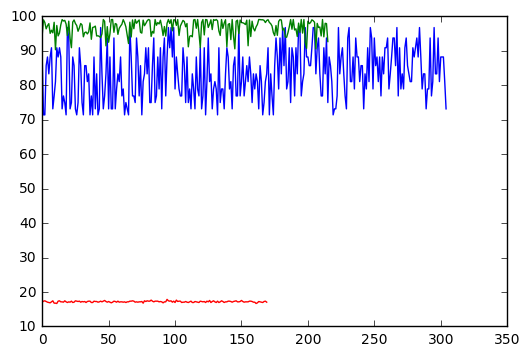

In [539]:
x_index = [i for i in range(len(HR_array_range))]
plt.plot(x_index, HR_array_range)
x_index = [i for i in range(len(R_array)-1)]
plt.plot(x_index, R_array[1:],'r')
x_index = [i for i in range(len(spo2_range))]
plt.plot(x_index, spo2_range, 'g')
plt.show()